In [8]:
import pandas as pd
import numpy as np

'''
Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
'''

data = pd.read_csv("diabetes_.csv")
# EDA
print(data.head())
print(data.info())
print(data.isnull().sum())
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [9]:
'''
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
'''
data.fillna(data.mean(numeric_only=True), inplace=True)


In [10]:
'''
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
'''

X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

def train_test_split(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_index = int(len(X) * (1 - test_size))

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test



In [20]:
'''
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.
'''
def euclid_distance(point1, point2):
    """
    Calculate straight-line distance between two data points
    """
    if point1.shape != point2.shape:
        raise ValueError("Both points must have same number of features")
    return np.sqrt(np.sum((point1 - point2) ** 2))


def knn_single_query(query, X_train, y_train, k=5):
    """
    Determine the class of one unknown data point
    by comparing it with k nearest training samples
    """
    # Compute distance from query point to all training points
    distances = [euclid_distance(query, x) for x in X_train]

    # Get indices of points sorted by distance
    sorted_index = np.argsort(distances)

    # Select indices of k closest neighbors
    nearest_index = sorted_index[:k]

    # Fetch class labels of nearest neighbors
    nearest_labels = y_train[nearest_index]

    # Choose the most frequent class label
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


def knn_test_sample(X_test, X_train, y_train, k=5):
    """
    Apply KNN prediction for each sample in the test dataset
    """
    predictions = [knn_single_query(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


def calculate_accuracy(y_test, y_pred):
    """
    Measure how many predictions match the actual labels
    """
    correct_prediction = np.sum(y_test == y_pred)
    total_prediction = len(y_pred)
    return (correct_prediction / total_prediction) * 100


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Predict classes for test samples
knn_prediction = knn_test_sample(X_test[:20], X_train, y_train, k=17)
actual_label = y_test[:20]

# Display results
print("Predicted Classes:", knn_prediction)
print("Actual Classes:", actual_label)

# Display accuracy
print("Accuracy:", calculate_accuracy(actual_label, knn_prediction),"%")


Predicted Classes: [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Classes: [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
Accuracy: 85.0 %


In [14]:
'''
Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
'''

# Feature scaling (Min-Max)
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Train-test split on scaled data
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled, y)

# KNN prediction on first 20 test samples
scaled_prediction = knn_test_sample(Xs_test[:20], Xs_train, ys_train, k=17)
actual_label_scale = ys_test[:20]

print("KNN algorithm prediction:", scaled_prediction)
print("Actual Label:", actual_label_scale)

# Accuracy on these 20 samples
print("Accuracy on scaled data (first 20 samples):", calculate_accuracy(actual_label_scale, scaled_prediction),"%")


KNN algorithm prediction: [0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
Actual Label: [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
Accuracy on scaled data (first 20 samples): 75.0 %


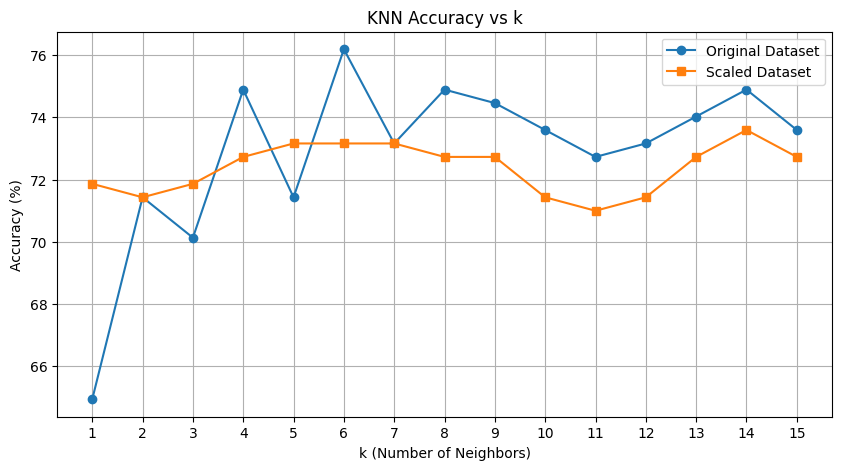

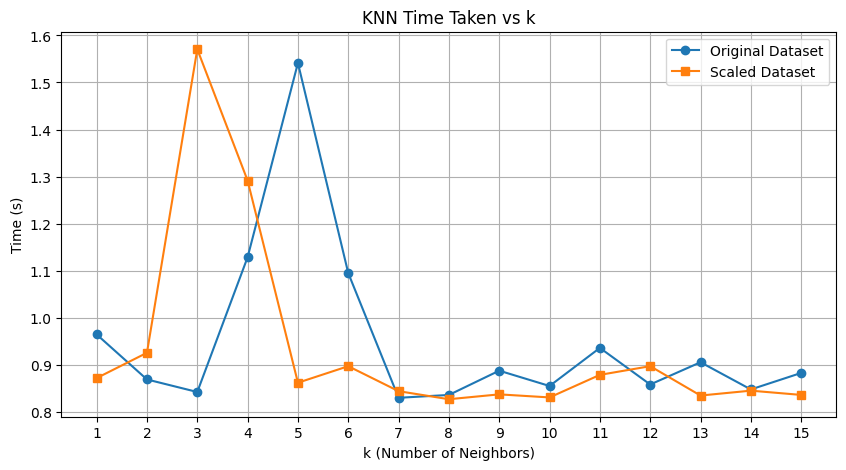

In [18]:
'''
Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
'''

import time
import matplotlib.pyplot as plt

# Function to run KNN for multiple k values
def exp_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN for each k in k_values and record:
    - Accuracy for test data
    - Time taken for predictions
    """
    accuracies = []  # Store accuracy for each k
    times = []       # Store prediction time for each k

    for k in k_values:
        start = time.time()  # Start timer
        y_pred = knn_test_sample(X_test, X_train, y_train, k)  # Predict
        end = time.time()    # End timer

        acc = calculate_accuracy(y_test, y_pred)  # Compute accuracy
        elapsed = end - start                      # Compute elapsed time

        accuracies.append(acc)
        times.append(elapsed)

    return accuracies, times

'''
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
'''

def plot_comparison(k_values, original, scaled, ylabel, title):
    """
    Plot original vs scaled dataset results for a given metric (accuracy or time)
    """
    plt.figure(figsize=(10,5))
    plt.plot(k_values, original, marker='o', label='Original Dataset')
    plt.plot(k_values, scaled, marker='s', label='Scaled Dataset')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.show()


k_values = range(1, 16)  # k from 1 to 15

# Run KNN for original dataset
accuracy_orig, time_orig = exp_knn_k_values(X_train, y_train, X_test, y_test, k_values)

# Run KNN for scaled dataset
accuracy_scaled, time_scaled = exp_knn_k_values(Xs_train, ys_train, Xs_test, ys_test, k_values)

# Plot Accuracy vs k
plot_comparison(k_values, accuracy_orig, accuracy_scaled, 'Accuracy (%)', 'KNN Accuracy vs k')

# Plot Time vs k
plot_comparison(k_values, time_orig, time_scaled, 'Time (s)', 'KNN Time Taken vs k')
